In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer

import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline


In [3]:
df = pd.read_csv('car_fuel_efficiency.csv')
df.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [4]:
df.describe()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,num_doors,fuel_efficiency_mpg
count,9704.000000,9222.000000,8996.000000,9704.000000,8774.000000,9704.000000,9202.000000,9704.000000
mean,199.708368,3.962481,149.657292,3001.280993,15.021928,2011.484027,-0.006412,14.985243
std,49.455319,1.999323,29.879555,497.894860,2.510339,6.659808,1.048162,2.556468
min,10.000000,0.000000,37.000000,952.681761,6.000000,2000.000000,-4.000000,6.200971
25%,170.000000,3.000000,130.000000,2666.248985,13.300000,2006.000000,-1.000000,13.267459
50%,200.000000,4.000000,149.000000,2993.226296,15.000000,2012.000000,0.000000,15.006037
75%,230.000000,5.000000,170.000000,3334.957039,16.700000,2017.000000,1.000000,16.707965
max,380.000000,13.000000,271.000000,4739.077089,24.300000,2023.000000,4.000000,25.967222


In [5]:
df.dtypes

engine_displacement      int64
num_cylinders          float64
horsepower             float64
vehicle_weight         float64
acceleration           float64
model_year               int64
origin                  object
fuel_type               object
drivetrain              object
num_doors              float64
fuel_efficiency_mpg    float64
dtype: object

In [6]:
df.isnull().sum()

engine_displacement      0
num_cylinders          482
horsepower             708
vehicle_weight           0
acceleration           930
model_year               0
origin                   0
fuel_type                0
drivetrain               0
num_doors              502
fuel_efficiency_mpg      0
dtype: int64

In [7]:
df.columns

Index(['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight',
       'acceleration', 'model_year', 'origin', 'fuel_type', 'drivetrain',
       'num_doors', 'fuel_efficiency_mpg'],
      dtype='object')

## EDA

In [8]:
categorical = ['origin','fuel_type','drivetrain']
numerical=['engine_displacement', 'num_cylinders', 'horsepower', 'vehicle_weight', 'acceleration', 'model_year', 'num_doors']

In [9]:
# Fill missing values with 0
df =df.fillna(0)
df.head(5)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,0.0,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,0.0,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [10]:
# Do train/validation/test split with 60%/20%/20% distribution.
# Use the train_test_split function and set the random_state parameter to 1
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1 )
len(df_train), len(df_val), len(df_test)

(5822, 1941, 1941)

In [11]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.fuel_efficiency_mpg.values
y_val = df_val.fuel_efficiency_mpg.values
y_test = df_test.fuel_efficiency_mpg.values

del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [12]:
df_train.head(4)

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors
0,120,5.0,169.0,2966.679505,13.9,2005,USA,Gasoline,Front-wheel drive,-1.0
1,200,3.0,143.0,2950.822121,17.1,2013,Asia,Diesel,Front-wheel drive,-1.0
2,180,6.0,180.0,3078.221669,17.4,2007,USA,Gasoline,All-wheel drive,0.0
3,280,5.0,174.0,2797.991793,0.0,2016,USA,Diesel,All-wheel drive,0.0


In [13]:
for c in categorical:
    print(df[c].value_counts())
    print() 

origin
Europe    3254
Asia      3247
USA       3203
Name: count, dtype: int64

fuel_type
Gasoline    4898
Diesel      4806
Name: count, dtype: int64

drivetrain
All-wheel drive      4876
Front-wheel drive    4828
Name: count, dtype: int64



In [14]:
# One hot encoding
# Use DictVectorizer(sparse=True) to turn the dataframes into matrices

dv = DictVectorizer(sparse=False)
train_dict = df_train[categorical + numerical].to_dict(orient = 'records')
X_train = dv.fit_transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient = 'records')
X_val = dv.transform(val_dict)

In [15]:
X_train.shape

(5822, 14)

# Implement Decision Tree

### Question 1

Let's train a decision tree regressor to predict the fuel_efficiency_mpg variable.

Train a model with max_depth=1.
Which feature is used for splitting the data?

'vehicle_weight'
'model_year'
'origin'
'fuel_type'

In [16]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import roc_auc_score

dt = DecisionTreeRegressor(max_depth=1)
dt.fit(X_train, y_train)

y_pred = dt.predict(X_val)
y_pred


array([16.88218854, 16.88218854, 16.88218854, ..., 12.9383797 ,
       12.9383797 , 16.88218854], shape=(1941,))

In [17]:
# Question 1 - Ans: vehicle_weight
from sklearn.tree import export_text
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- vehicle_weight <= 3022.11
|   |--- value: [16.88]
|--- vehicle_weight >  3022.11
|   |--- value: [12.94]



### Question 2

Train a random forest regressor with these parameters:

n_estimators=10
random_state=1
n_jobs=-1 (optional - to make training faster)
What's the RMSE of this model on the validation data?

0.045
0.45
4.5
45.0

In [18]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import root_mean_squared_error
rfr = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)
rfr.fit(X_train, y_train)

y_pred = rfr.predict(X_val)
y_pred
rmse = root_mean_squared_error(y_val, y_pred)
print(rmse)


0.4599777557336149


### Question 3

Now let's experiment with the n_estimators parameter

Try different values of this parameter from 10 to 200 with step 10.
Set random_state to 1.
Evaluate the model on the validation dataset.
After which value of n_estimators does RMSE stop improving? Consider 3 decimal places for calculating the answer.

10
25
80
200
If it doesn't stop improving, use the latest iteration number in your answer.

<!-- Question 1
Let's train a decision tree regressor to predict the fuel_efficiency_mpg variable.

Train a model with max_depth=1.
Which feature is used for splitting the data?

'vehicle_weight'
'model_year'
'origin'
'fuel_type' -->

In [19]:
score = []
for n in range(10, 201, 10):
    rfr = RandomForestRegressor(n_estimators=n, random_state=1, n_jobs=-1)
    rfr.fit(X_train, y_train)
    y_pred = rfr.predict(X_val)
    rmse = root_mean_squared_error(y_val, y_pred)
    score.append((n, round(rmse, 4)))

In [20]:
df_score = pd.DataFrame(score, columns=['estimator','rmse'])
df_score

,estimator,rmse
0,10,0.4600
1,20,0.4537
2,30,0.4507
3,40,0.4480
4,50,0.4462
5,60,0.4453
6,70,0.4446
7,80,0.4449
8,90,0.4447
9,100,0.4443


In [21]:
# sns.heatmap(df_score, annot=True, fmt=".3f")

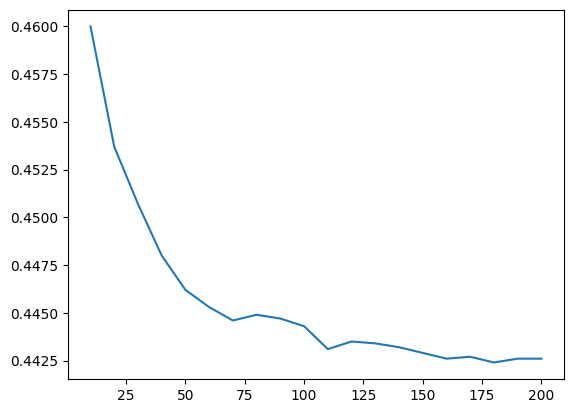

In [22]:
plt.plot(df_score.estimator, df_score.rmse) # Question 3 = Ans: 80

### Question 4

Let's select the best max_depth:

Try different values of max_depth: [10, 15, 20, 25]
For each of these values,
try different values of n_estimators from 10 till 200 (with step 10)
calculate the mean RMSE
Fix the random seed: random_state=1
What's the best max_depth, using the mean RMSE?

10
15
20
25

In [23]:
max_depth =  [10, 15, 20, 25]
score = []
for d in max_depth:
    for n in range(10, 201, 10):
        rfr = RandomForestRegressor(max_depth=d, n_estimators=n, random_state=1, n_jobs=-1)
        rfr.fit(X_train, y_train)
        y_pred = rfr.predict(X_val)
        rmse = root_mean_squared_error(y_val, y_pred)
        score.append((d, n, round(rmse, 3)))


In [24]:
df_score = pd.DataFrame(score, columns=['max_depth', 'estimator','rmse'])
df_score.head()

,max_depth,estimator,rmse
0,10,10,0.452
1,10,20,0.449
2,10,30,0.446
3,10,40,0.444
4,10,50,0.443


In [25]:
df_scores_pivot = df_score.pivot(index='estimator', columns=['max_depth'], values=['rmse'])
df_scores_pivot.round(3)

rmse                     
max_depth     10     15     20     25
estimator                            
10         0.452  0.457  0.459  0.460
20         0.449  0.452  0.453  0.454
30         0.446  0.450  0.451  0.451
40         0.444  0.448  0.448  0.448
50         0.443  0.446  0.446  0.446
60         0.442  0.445  0.445  0.446
70         0.442  0.444  0.444  0.445
80         0.442  0.444  0.445  0.445
90         0.442  0.444  0.445  0.445
100        0.442  0.444  0.445  0.444
110        0.441  0.443  0.444  0.443
120        0.441  0.443  0.444  0.444
130        0.441  0.443  0.444  0.443
140        0.441  0.443  0.443  0.443
150        0.440  0.443  0.443  0.443
160        0.440  0.442  0.443  0.443
170        0.440  0.443  0.443  0.443
180        0.440  0.442  0.443  0.442
190        0.440  0.442  0.443  0.443
200        0.440  0.442  0.443  0.443

In [26]:
# sns.heatmap(df_score, annot=True, fmt=".3f")

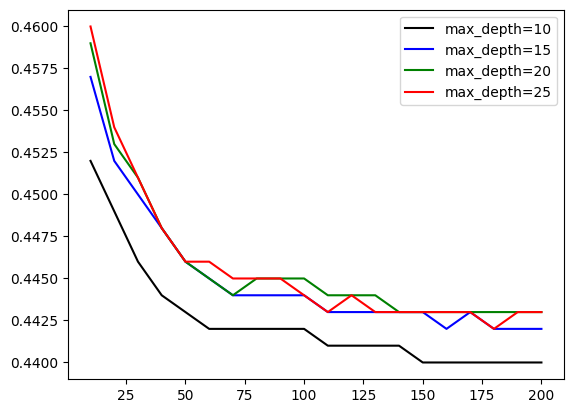

In [27]:
colors = ['black', 'blue', 'green', 'red']      # Question 4 - Ans: 10
depths = [10, 15, 20, 25]
for d, col in zip(depths, colors):
    df_subset = df_score[df_score.max_depth == d]
    
    plt.plot(df_subset.estimator, df_subset.rmse, color=col,
             label='max_depth=%d' % d)

plt.legend()

### Question 5

We can extract feature importance information from tree-based models.

At each step of the decision tree learning algorithm, it finds the best split. When doing it, we can calculate "gain" - the reduction in impurity before and after the split. This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the feature_importances_ field.

For this homework question, we'll find the most important feature:

Train the model with these parameters:
n_estimators=10,
max_depth=20,
random_state=1,
n_jobs=-1 (optional)
Get the feature importance information from this model
What's the most important feature (among these 4)?

vehicle_weight
horsepower
acceleration
engine_displacement


In [28]:
rfr = RandomForestRegressor(n_estimators=10, max_depth=20, random_state=1, n_jobs=-1)
rfr.fit(X_train, y_train)
feature_importance = rfr.feature_importances_

# Combine with feature names
feature_importance_df = pd.DataFrame({
    'Feature': dv.get_feature_names_out(),
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)

print(feature_importance_df)

                         Feature  Importance
13                vehicle_weight    0.959162
6                     horsepower    0.016040
0                   acceleration    0.011471
3            engine_displacement    0.003269
7                     model_year    0.003182
8                  num_cylinders    0.002359
9                      num_doors    0.001591
12                    origin=USA    0.000555
11                 origin=Europe    0.000520
10                   origin=Asia    0.000476
1     drivetrain=All-wheel drive    0.000382
4               fuel_type=Diesel    0.000344
5             fuel_type=Gasoline    0.000337
2   drivetrain=Front-wheel drive    0.000312


In [29]:
# Question 5 - Ans: vehicle_weight

### Question 6

Now let's train an XGBoost model! For this question, we'll tune the eta parameter:

Install XGBoost
Create DMatrix for train and validation
Create a watchlist
Train a model with these parameters for 100 rounds:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
Now change eta from 0.3 to 0.1.

Which eta leads to the best RMSE score on the validation dataset?

0.3
0.1
Both give equal value

In [ ]:
# pip install XGBoost

Note: you may need to restart the kernel to use updated packages.


In [31]:
import xgboost as xgb

features = list(dv.get_feature_names_out())
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [43]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [44]:
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5,
                  evals=watchlist)

[0]	train-rmse:1.81393	val-rmse:1.85444
[5]	train-rmse:0.51381	val-rmse:0.55664
[10]	train-rmse:0.37115	val-rmse:0.43896
[15]	train-rmse:0.34666	val-rmse:0.43362
[20]	train-rmse:0.33553	val-rmse:0.43376
[25]	train-rmse:0.32268	val-rmse:0.43683
[30]	train-rmse:0.31475	val-rmse:0.43752
[35]	train-rmse:0.30960	val-rmse:0.43784
[40]	train-rmse:0.30202	val-rmse:0.43968
[45]	train-rmse:0.29126	val-rmse:0.44024
[50]	train-rmse:0.28456	val-rmse:0.44140
[55]	train-rmse:0.27618	val-rmse:0.44225
[60]	train-rmse:0.26768	val-rmse:0.44290
[65]	train-rmse:0.26174	val-rmse:0.44352
[70]	train-rmse:0.25489	val-rmse:0.44531
[75]	train-rmse:0.24792	val-rmse:0.44628
[80]	train-rmse:0.24254	val-rmse:0.44689
[85]	train-rmse:0.23644	val-rmse:0.44749
[90]	train-rmse:0.23193	val-rmse:0.44839
[95]	train-rmse:0.22475	val-rmse:0.44904
[99]	train-rmse:0.21950	val-rmse:0.45018


In [45]:
y_pred = model.predict(dval)
rmse = root_mean_squared_error(y_val, y_pred)
rmse

0.45017755678087246

In [ ]:
# %%capture output
xgb_params = {
    'eta': 0.1, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
model = xgb.train(xgb_params, dtrain, num_boost_round=100, verbose_eval=5,
                  evals=watchlist)

[0]	train-rmse:2.28944	val-rmse:2.34561
[5]	train-rmse:1.41247	val-rmse:1.44988
[10]	train-rmse:0.91008	val-rmse:0.94062
[15]	train-rmse:0.63402	val-rmse:0.66672
[20]	train-rmse:0.48983	val-rmse:0.53064
[25]	train-rmse:0.41881	val-rmse:0.46891
[30]	train-rmse:0.38342	val-rmse:0.44289
[35]	train-rmse:0.36435	val-rmse:0.43250
[40]	train-rmse:0.35343	val-rmse:0.42746
[45]	train-rmse:0.34621	val-rmse:0.42595
[50]	train-rmse:0.33998	val-rmse:0.42498
[55]	train-rmse:0.33480	val-rmse:0.42449
[60]	train-rmse:0.33054	val-rmse:0.42456
[65]	train-rmse:0.32602	val-rmse:0.42493
[70]	train-rmse:0.32202	val-rmse:0.42503
[75]	train-rmse:0.31895	val-rmse:0.42526
[80]	train-rmse:0.31667	val-rmse:0.42563
[85]	train-rmse:0.31440	val-rmse:0.42574
[90]	train-rmse:0.31059	val-rmse:0.42586
[95]	train-rmse:0.30625	val-rmse:0.42611
[99]	train-rmse:0.30419	val-rmse:0.42623


In [ ]:
y_pred = model.predict(dval)   # Question 6 answer is 0.1 ->Best Rsme is the lowset value 
rmse = root_mean_squared_error(y_val, y_pred)
rmse

0.42622800553359225

In [ ]:

# %%capture output  -> This will capture the model output in outpur variable then this can be parsed using the below function
# s = output.stdout

def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results